In [419]:
import torch

a = torch.randn(3)*0.1
print(a)
torch.acos(a)

tensor([0.0583, 0.1707, 0.0065])


tensor([1.5125, 1.3993, 1.5643])

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

a = torch.randn(100,3)
b = torch.randn(100,10)
c = torch.randn(100,100)

# 각도 분포 
a@a.T

tensor([[ 1.6051,  2.7742, -0.9732,  ...,  0.6060,  1.2416,  0.7968],
        [ 2.7742,  5.9777, -2.0122,  ..., -0.0083,  2.0607,  0.3044],
        [-0.9732, -2.0122,  3.3411,  ..., -2.9324,  0.9200,  0.4199],
        ...,
        [ 0.6060, -0.0083, -2.9324,  ...,  4.2464, -1.2288,  0.6090],
        [ 1.2416,  2.0607,  0.9200,  ..., -1.2288,  1.9892,  1.0679],
        [ 0.7968,  0.3044,  0.4199,  ...,  0.6090,  1.0679,  1.5053]])

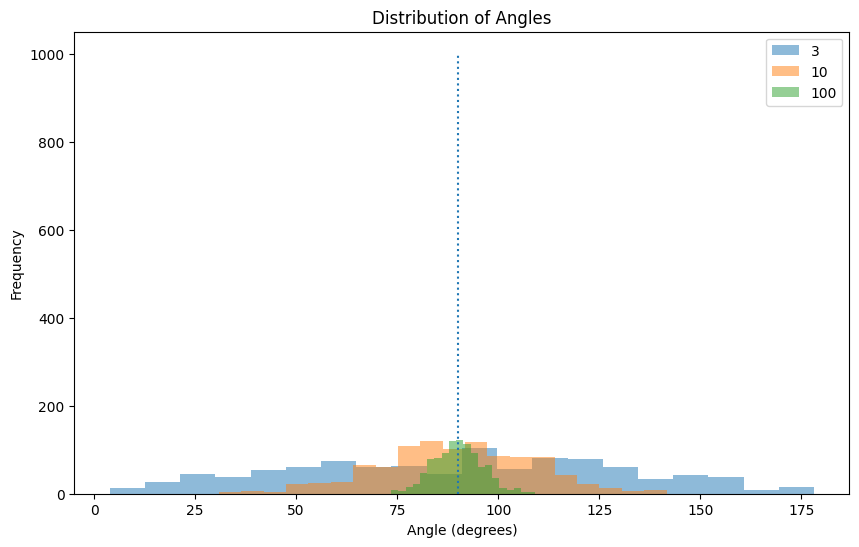

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the data frame
deg = pd.DataFrame({'n': np.repeat([3, 10, 100], 1000),
                   'i': np.repeat(range(1, 1001), 3),
                   'deg': np.nan})

# Calculate the angle for each group
for n in [3, 10, 100]:
    for i in range(1, 1001):
        u = np.random.normal(0, 1, n)
        v = 2 * np.random.normal(0, 1, n)

        rad = np.arccos(np.sum(u * v) / (np.sqrt(np.sum(u ** 2)) * np.sqrt(np.sum(v ** 2))))
        deg.loc[(deg['n'] == n) & (deg['i'] == i), 'deg'] = rad * 180 / np.pi

# Create the histogram
plt.figure(figsize=(10, 6))
g = deg.groupby('n')
for name, group in g:
    plt.hist(group['deg'], bins=20, alpha=0.5, label=name)

# Add a vertical line at 90 degrees
plt.vlines(90, 0, 1000, linestyle='dotted')

# Set the title and labels
plt.title('Distribution of Angles')
plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
# plt.ylim(200)

# Add the legend and show the plot
plt.legend()
plt.show()


In [395]:
import torch
class MyModel00(torch.nn.Module):
    def __init__(self):
        super(MyModel00, self).__init__()
        self.fc1 = torch.nn.Linear(100, 500)
        self.fc2 = torch.nn.Linear(500, 3000)
    def forward(self, x):
        return self.fc2(self.fc1(x))
model00 = MyModel00()

# 모델 구조와 파라미터 개수 출력
parameter_count = sum(p.numel() for p in model00.parameters() if p.requires_grad)
print('모델 파라미터 개수 : ',parameter_count/1e6,'Million')

모델 파라미터 개수 :  1.5535 Million


# Custom dataset, dataloader


In [1]:
label = ["Science",
        "News",
        "Food",
        "Blog",
        "Tech",
        "Informative",
        "Comedy,Entertainment",
        "Entertainment",
        "Automobile",
        "Tech,Informative",
        "Automobile,Comedy",
        "VideoGames",
        "Food,Entertainment",
        "Blog,Comedy",
        "Comedy,Informative",
        "Tech,Comedy",
        "Comedy",
        "Blog,Science",
        "Blog,Entertainment",
        "Entertainment,Comedy",
        "Tech,News",
        "Entertainment,Blog"]

label_dict = {}

for i,name in enumerate(label):
    label_dict[name] = i
    
label_dict


{'Science': 0,
 'News': 1,
 'Food': 2,
 'Blog': 3,
 'Tech': 4,
 'Informative': 5,
 'Comedy,Entertainment': 6,
 'Entertainment': 7,
 'Automobile': 8,
 'Tech,Informative': 9,
 'Automobile,Comedy': 10,
 'VideoGames': 11,
 'Food,Entertainment': 12,
 'Blog,Comedy': 13,
 'Comedy,Informative': 14,
 'Tech,Comedy': 15,
 'Comedy': 16,
 'Blog,Science': 17,
 'Blog,Entertainment': 18,
 'Entertainment,Comedy': 19,
 'Tech,News': 20,
 'Entertainment,Blog': 21}

## data set

## 목표

```python
## 목표

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


```


# Randomness Controll

## 1. torch.manual_seed(random_seed)
위와 같이 한 줄만 입력해주면 torch.블라블라 를 통해 발생하는 randomness들이 통제가 됩니다. 다만 CUDA 함수를 사용하는 PyTorch 함수들 중에 nondeterministic한 함수가 존재한다고 합니다. 대표적인 예시가 atomic operation, 그 중에서도 atomicAdd 인데요, 이 연산이 포함되어있는 함수들은 대표적으로 forward kernel 중에는 torch.Tensor.index_add_() , torch.Tensor.scatter_add_() , torch.bincount() 연산이 있고, backward kernel 중에는 torch.nn.functional.embedding_bag() , torch.nn.functional.ctc_loss() , torch.nn.functional.interpolate() 이 존재한다고 합니다.

이 6가지 연산을 사용하고 계시다면, 현재로서는 nondeterminism을 피할 방법이 없다고 합니다! ㅠㅠ

## 2.CuDNN

 CuDNN은 딥러닝에 특화된 CUDA library로 주로 환경 설정을 할 때 CUDA와 CuDNN을 함께 설치하고, 대부분 딥러닝 프레임워크에서 필수적으로 사용되는 라이브러리

 ## 3. Numpy

 Scikit-learn 등 딥러닝에 도움이 되는 주요 라이브러리도 Numpy를 backend로 사용하고 있고, PyTorch로 코드를 짤 때 대부분 Numpy로 data를 받아오고, metric을 계산하는 경우가 많아서 Numpy의 random seed도 고정을 해주어야 합니다. 마찬가지로 1줄로 random seed를 설정할 수 있습니다.

```python
 np.random.seed(random_seed)
```

## 4. Random

아직 하나 더 남았습니다. dataset 구성할 때 사용한 torchvision의 transforms 함수 때문이었습니다.
torchvision의 transforms를 대부분 사용하실 텐데 이 경우에는 마지막으로 python random 라이브러리도 randomness를 제어해주셔야 합니다.

```python
random.seed(random_seed)
```

---

### randomness 제어하는 이유

contrastive learning을 하기 위해서, 지금 Positive traindataset을 하나 더 만드려고 합니다.

먼저 똑같이 2개를 만들고 image에는 tranforms를 가하고, text에는 title데이터와 섞어서 더 넣어주려고 합니다.

In [33]:
import torch
import numpy as np
import random 
RANDOMNESS = False

random_seed = 77

if RANDOMNESS == True:
    # torch.manual_seed(random_seed)
    # torch.cuda.manual_seed(random_seed)
    # torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)
    
    
## SHUFFLE

SHUFFLE = False

/Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <870081F6-12FD-3CEA-BC5C-30F4764F2A98> /Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <F2FE5CF8-5B5B-3FAD-ADF8-C77D90F49FC9> /Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Othe

torch.Size([3, 224, 224])
torch.Size([1, 77])
0
0
3d6DsjIBzJ4


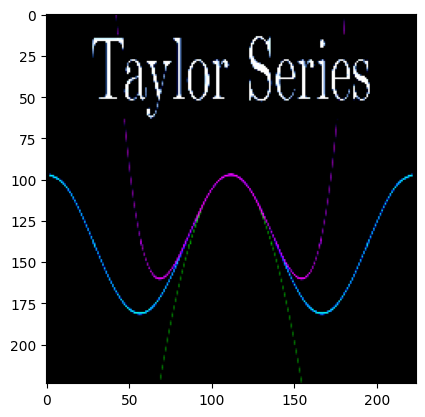

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader

import clip
import os

import json
from PIL import Image

from transformers import CLIPProcessor, CLIPModel



class YoutubeDataset(Dataset):
    
    def __init__(self,
                batch_size=16,
                valid_size=0.1,
                data_dir = '/Users/juniverse/Desktop/pointcloud/VectorUniverse/Data/thumbnails/images/',
                transform = None):
  
        self.transform = transform
        # load the dataset
        train_dataset = datasets.ImageFolder(
            root=data_dir, transform=self.transform,
        )

        num_train = len(train_dataset) # 2303
        
        data = pd.read_csv('/Users/juniverse/Desktop/pointcloud/VectorUniverse/Data/Youtube_thumbnails/metadata.csv')
        
        text_list=[]
        id_list = [] 
        
        for i in range(num_train):
            img_id_dir =train_dataset.imgs[i][0].split('.jpg')[0].split('/')[-1]
            # 3d6DsjIBzJ4
            id_list.append(img_id_dir)
            x_text = data[data['Id']==img_id_dir]['Title'].values[0]
            # 그것에 해당하는 타이틀 아이디.
            text_list.append(x_text)

        ch2cat = {}
        for ch in train_dataset.classes: #channels:
            ch2cat[ch] = data[data['Channel']==ch]['Category'].values[0]
            # 3Blue1Brown': 'Science',
            
        id2ch = {}
        for k,v in train_dataset.class_to_idx.items():
            id2ch[v] = k
            # {0: '3Blue1Brown',
        
        id2cat = {}
        for ch,v in train_dataset.class_to_idx.items():
            id2cat[v] =  data[data['Channel']==ch]['Category'].values[0]
            # {0: 'Science',

        id2cat_id = {}
        for ch,v in train_dataset.class_to_idx.items():
            id2cat_id[v] =  label_dict[data[data['Channel']==ch]['Category'].values[0]]             
            # {0: '0',
        self.id_list = id_list
        self.text_samples = text_list
        self.tokenizer = clip.tokenize
        self.num_train = num_train
        self.train_dataset = train_dataset
        self.ch2cat = ch2cat
        self.id2ch = id2ch
        self.id2cat = id2cat
        self.id2cat_id = id2cat_id
        
    def __len__(self):
        # return len(self.text_samples)
        return self.num_train

    def __getitem__(self, i):
        image =self.train_dataset[i][0]
        text = self.tokenizer(self.text_samples[i])
        data_id = self.id_list[i] # id 번호
        channel_id = self.train_dataset[i][1] # 채널 번호 index 
        channel_text = self.id2ch[channel_id] # 채널 이름
        category_id = self.id2cat_id[channel_id]
        category_text = self.id2cat[channel_id]    # 채널 카테고리
        
        return image,text,channel_id ,category_id,data_id

    
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225],
)

# define transforms


train_transform = transforms.Compose([transforms.Resize((256,256)),
                                    transforms.RandomCrop(224),
                                    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
                                    transforms.ToTensor(),
                                    normalize])

dataset = YoutubeDataset(transform=train_transform)#text_list)

data = pd.read_csv('/Users/juniverse/Desktop/pointcloud/VectorUniverse/Data/Youtube_thumbnails/metadata.csv')
for i in dataset:
    print(i[0].shape)
    print(i[1].shape)
    print(i[2])
    print(i[3])
    print(i[4])    
    x = i[0].permute(1,2,0).cpu().numpy()
    plt.imshow(x)
    break


In [3]:
data[data['Id']==i[4]]

,Id,Channel,Category,Title
28,3d6DsjIBzJ4,3Blue1Brown,Science,"Taylor series | Chapter 11, Essence of calculus"


# dataloader


In [4]:
from sklearn.model_selection import train_test_split

# 나누는데 좀 걸림.
# Split the train dataset into train and validation sets
train_dataset, valid_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

len(train_dataset),len(valid_dataset)

(1842, 461)

자 요약본 갑니다. ~
먼저 markoc chain - discrete state space
stochastic model describing sequence of possible states in which the probability each event depends only on the state 

#### 이산시간 마코브 체인 
$$
P(X_{n+=1}=x|X_1=x_1,X_2=x_2,...,X_n=x_n) = P(X_{n+1}=x|X_n=x_n)
$$

두 조건부확률이 잘 정의된경우. 양수이다. time-homogeneous markov chain, 

A = LU 분해 가능

연속 시간 마코브 체인

#### 헤밀토니안 몬테카를롤

$$
f(x), x \in \mathbb{R}^d
$$

Hamiltonian's equation

$$
\frac{d x_i}{dt} = \frac{\partial H}{\partial p_i}
$$

$$
\frac{d p_i}{dt} = -\frac{\partial H}{\partial x_i}
$$

$$
H(X,P) = U(X) + \frac{1}{2} P^T M^{-1}P

In [ ]:
# model의 initial weight를 샘플링하는방법.

In [5]:
# based on https://gist.github.com/srikarplus/8bdb5bedf0ca25e894e39ea78fce2f39
def get_train_valid_loader(train_dataset, valid_dataset, 
                           batch_size,
                           random_seed=2130,
                           shuffle=SHUFFLE,
                           num_workers=4,
                           pin_memory=True):
    """
    
    Params
    ------
    - data_dir: path directory to the dataset.
    - batch_size: how many samples per batch to load.
    - augment: whether to apply the data augmentation scheme
      mentioned in the paper. Only applied on the train split.
    - random_seed: fix seed for reproducibility.
    - valid_size: percentage split of the training set used for
      the validation set. Should be a float in the range [0, 1].
    - shuffle: whether to shuffle the train/validation indices.
    - show_sample: plot 9x9 sample grid of the dataset.
    - num_workers: number of subprocesses to use when loading the dataset.
    - pin_memory: whether to copy tensors into CUDA pinned memory. Set it to
      True if using GPU.
    Returns
    -------
    - train_loader: training set iterator.
    - valid_loader: validation set iterator.
    """

    
    if shuffle:
      np.random.seed(random_seed) 
    
    # train_dataset, valid_dataset       
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=SHUFFLE,num_workers=0, collate_fn=None, pin_memory=True)
    valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=SHUFFLE,num_workers=0, collate_fn=None, pin_memory=True)

    # return (img_train_loader, img_valid_loader, train_dataset.class_to_idx)
    return (train_dataloader, valid_dataloader)

if __name__=='__main__':
    batch_size = 16
    train_loader,valid_loader = get_train_valid_loader(train_dataset, valid_dataset,  batch_size)
    # print(train_loader)


In [6]:
batch_size = 16
train_loader,valid_loader = get_train_valid_loader(train_dataset, valid_dataset,  batch_size)
for img,txt,ch,cat,id in train_loader:
    print(img.shape)
    print(txt.shape)
    print(ch)
    print(cat)
    print(id)
    break

print()
print()
for img,txt,ch,cat,id in valid_loader:
    print(img.shape)
    print(txt.shape)
    print(ch)
    print(cat)
    print(id)
    break

torch.Size([16, 3, 224, 224])
torch.Size([16, 1, 77])
tensor([36,  0,  5, 86, 39, 87, 76, 60, 79, 49, 62, 74, 69, 66, 12, 21])
tensor([ 3,  0,  1,  8, 16, 11, 21,  5,  8,  4, 11,  6,  1,  6,  5,  3])
('-xfra2_tVF8', 'WUvTyaaNkzM', 'RwTAgom_VX8', 'OYCvbBijvQM', 'leL_bsHEZdM', 'G3gqFdFXoC0', 'ugElBfp0j98', 'QgydTdThoeA', '9mhOJggoa_Q', 't9R7xx0joOU', 'Xu1Qo-WFQFo', 'cLNyF1Zw5tg', 'uN84HhcdIws', '48RFno9AQ9A', 'sWy1qmMoToM', 'Strwla1ELdA')


torch.Size([16, 3, 224, 224])
torch.Size([16, 1, 77])
tensor([56, 50, 29, 55, 76, 21, 41, 48, 84, 44, 83, 29, 63, 89, 25, 81])
tensor([14, 18,  2,  1, 21,  3,  5, 11,  0, 11,  5,  2,  1, 13,  2,  1])
('W12vb_Crf00', 'ayXxwJJId_c', 'jwu2y9x5OlM', 'Q9SZlypyK-4', 'PDkC1eebWbU', '_uX9adalziQ', 'CLUy9DH7V2M', 'MujRLvZ61jE', 'JTvcpdfGUtQ', 'G4xBNFD1p14', 'BShvYeyMm_Y', 'dQ4ZAZJphx4', 'Mf76yyTY7Ss', 's4mGOrbEKbs', 'p28wMbunulQ', 'AYA9twQXBq8')


### 조금더 간단한 dataset을 준비했다.

### preprocessed image와 tokenize된 title의 쌍 데이터셋이다.

## dataset 준비

## image, title list 준비


In [174]:
import os
img_dir = '/Users/juniverse/Desktop/pointcloud/VectorUniverse/Data/thumbnails/images/'
data = pd.read_csv('/Users/juniverse/Desktop/pointcloud/VectorUniverse/Data/Youtube_thumbnails/metadata.csv')
# 이미지 파일 목록 생성
img_list = []
id_list = []
for file in os.listdir(img_dir):
    ch_dir = os.path.join(img_dir,file)
    for images in os.listdir(ch_dir):
        # print(images)
        if images.endswith('.jpg'):
            img_list.append(os.path.join(ch_dir, images))
            img_id = images.split('.jpg')[0]
            id_list.append(img_id)

# 이미지 파일 목록 출력
# print(img_list)
print(id_list) # 2303 

text_list = []
cat_list = []
ch_list = []

for i in id_list:
    text_list.append(data[data["Id"]==i]['Title'].values[0])
    cat_list.append(data[data["Id"]==i]['Category'].values[0])
    ch_list.append(data[data["Id"]==i]['Channel'].values[0])

# 아래 다섯가지로 만들 수 있음. 이미지가 부족해서 이미지를 기준으로 만듬. 
# img_list = []
# id_list = []
# text_list = []
# cat_list = []
# ch_list = []
new_list = []
for cat,text in zip(cat_list,text_list):
    new_list.append(cat+', '+text)

['l0IefQRFVfE', 'pYy5-KowMj0', '015wj1C5wK0', 'VnIsuYVlSls', 'C0f2pu0EVSg', '3kJPxsELVAk', 'MGGhz29kYYA', 'gtXpRZUAc1o', 'qNxQRgsF2NA', 'bdUVehx6UBU', 'WTxTBFU7Sdk', 'pF2mNC4EXfA', 'gKZPPYWTtvc', 'dojhP_1W5tA', 'iokVvwcut5o', '6L-BogO6HwU', 'cvHkteWF5GM', 'y1XbPl1XB44', 'BDd-5qCiL-A', 'AfjrpjqdQxI', 'ZAYZWgGxKO4', '0EhcAzhauRM', '5HInaJxFxWs', 'I6w5AN_Wcak', 'oMA7o8olHzY', 'Gy4QHTgikbk', '3xH1vBuDbBA', 'yiMlzXMr0KU', 'RoVnb_TlJ8A', 'A0Lf8eP41vs', 'tj1D9KAYV1E', 'ipRvjS7q1DI', 'RYSvCb14JjU', 'u3Mqvex6tIE', 'dLyt7H7gyhI', 'kEIvicUmegs', 'UNbgIxL3PyM', '52GCI7rqV4A', 'KoihlAl7ugQ', 'Lwq2WfpY-ss', 'YLWjn0TFH3U', 'mTztlpAcips', '1GfuKF4uENc', 'N5SrDhe4bE0', 'X2jakwIVLbY', '_bggaA5AURA', 'NGbFtTYQpus', 'z2qNEOnlxjA', 'uyU-lKE0Go8', 'oAADFdfa-G4', 'Jl0IDXkYKbk', 'P09pTe54uKM', 'AQWeO5wMekQ', 'RyLXLFaspj0', 'mqZS-hEPE6k', '39ii9LvnDoE', '0xPwHR8_D2w', 'REhLHpdLCE0', 'PDkC1eebWbU', 'qpipLfMiaYU', 'Ev3__YJJH3M', 'YNaBoKLX52M', 'JzWtoP1Xhc0', '5pAnk9MKHzo', 'IbgPYS3RnTA', 'Z4BKrSazQh0', 'FWYsvw_U

# Dataset


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


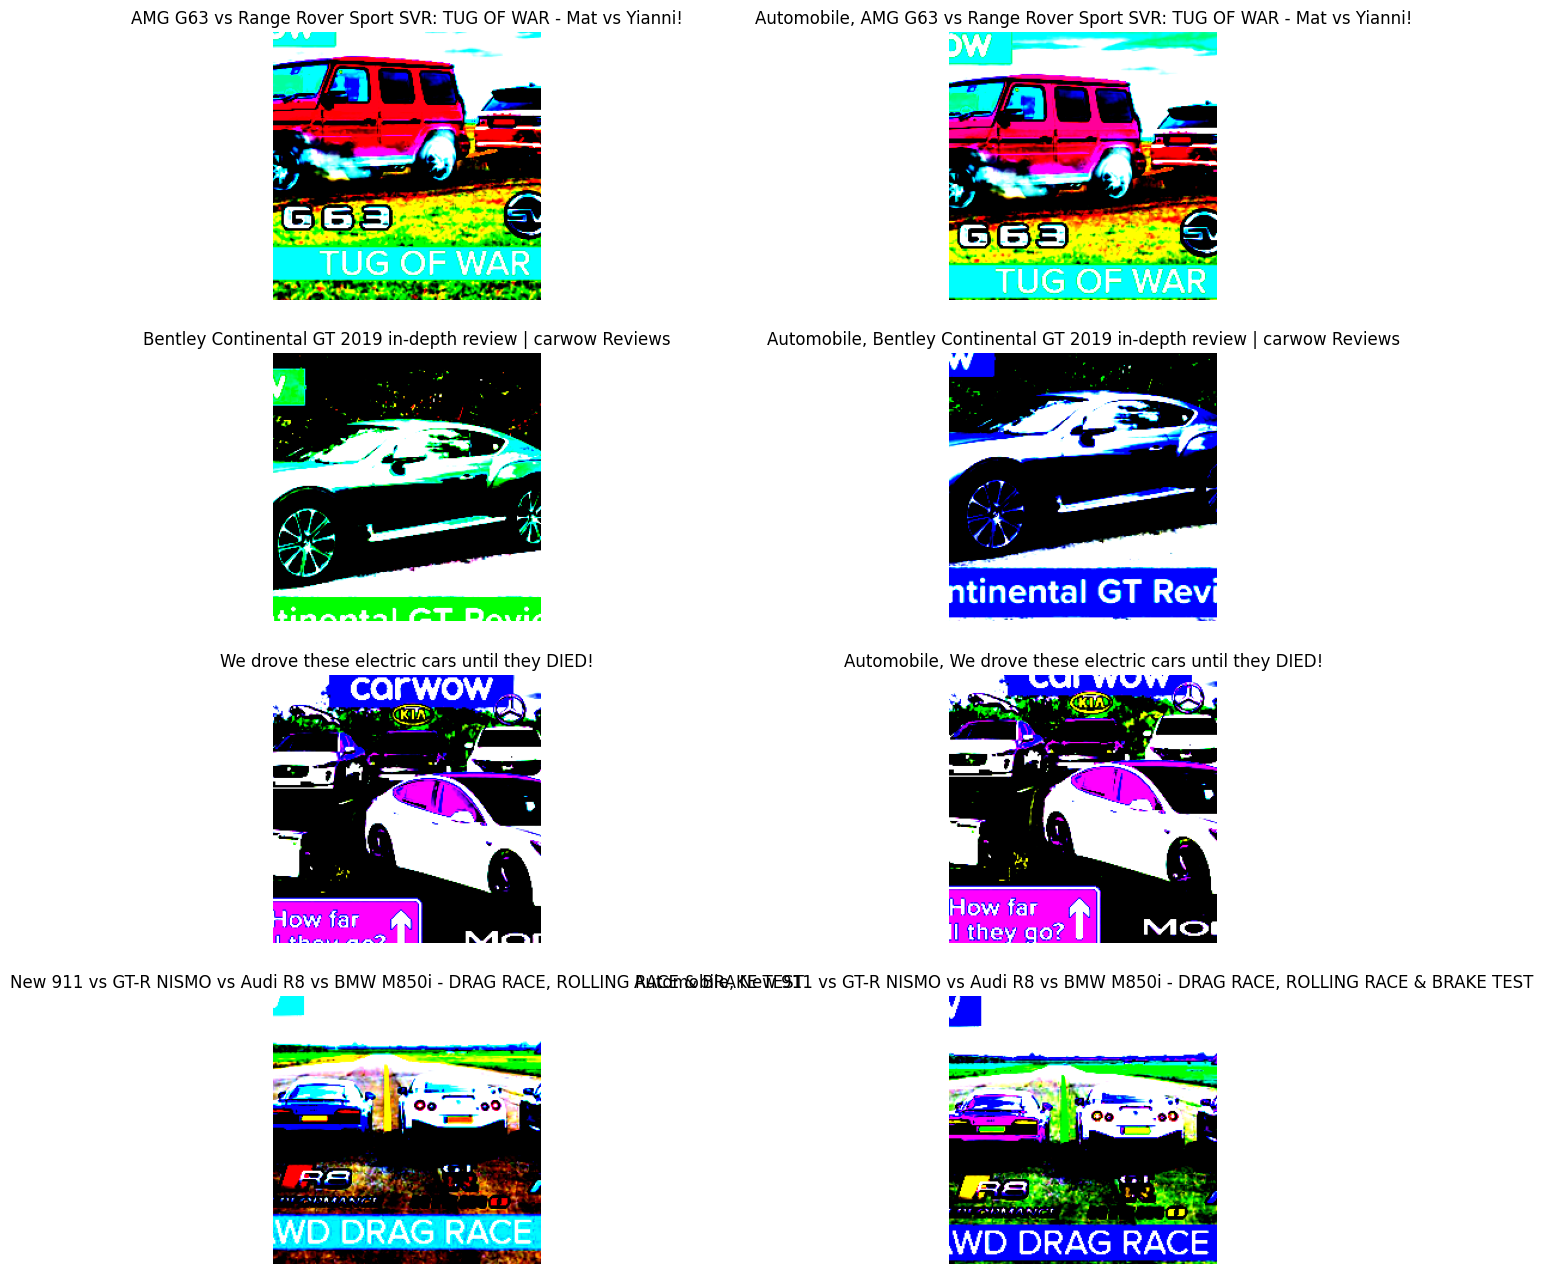

In [209]:
import json
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import clip
from transformers import CLIPProcessor, CLIPModel

# with open(json_path, 'r') as f:
#     input_data = []
#     for line in f:
#         obj = json.loads(line)
#         input_data.append(obj)

# model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model, preprocess = clip.load("ViT-B/32", device=device)

class image_title_dataset(Dataset):
    def __init__(self, list_image_path,list_txt,transforms):
        # Initialize image paths and corresponding texts
        self.image_path = list_image_path
        
        # Tokenize text using CLIP's tokenizera
        self.title  = clip.tokenize(list_txt)
        self.transform = transforms
    def __len__(self):
        return len(self.title)

    def __getitem__(self, idx):
        # Preprocess image using CLIP's preprocessing function
        image = preprocess(Image.open(self.image_path[idx]))
        
        if self.transform != None:
            image = self.transform(image)
        title = self.title[idx]
        return image, title
    
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225],
)

# define transforms
CJ_value = 0.2
train_transform = transforms.Compose([transforms.Resize((256,256)),
                                    transforms.RandomCrop(224),
                                    transforms.ColorJitter(brightness=CJ_value, contrast=CJ_value, saturation=CJ_value, hue=CJ_value),
                                    # transforms.ToTensor(),
                                    normalize])

# train_transform = None
youtube_dataset = image_title_dataset(img_list,text_list,train_transform)

# 이미지는 transforms# 이걸 다르게 가져가보자.
# 텍스트는 category 값을 추가한 new_list를 가져가자.

youtube_dataset2 = image_title_dataset(img_list,new_list,train_transform) 

plt.figure(figsize=(16, 16))
num=1477
for i in range(4):
    a,b = youtube_dataset[num+i]
    a = a.numpy().transpose(1,2,0)
    plt.subplot(4, 2, 2*i + 1)
    plt.title(text_list[num+i])
    plt.imshow(a)
    plt.axis("off")

    a,b= youtube_dataset2[num+i]

    a = a.numpy().transpose(1,2,0)
    plt.subplot(4, 2, 2*i + 2)
    plt.title(new_list[num+i])
    plt.imshow(a)
    plt.axis("off")

# 비슷한 단어끼리 같은지 실험. 

In [223]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# image = preprocess(Image.open("CLIP.png")).unsqueeze(0).to(device)
text0 = clip.tokenize(["a diagram a dog a cat"]).to(device) 
text1 = clip.tokenize(["tomato","mouse","universe"]).to(device) 
text2 = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)

with torch.no_grad():
    # image_features = model.encode_image(image)
    text_features0 = model.encode_text(text0)
    text_features1 = model.encode_text(text1)
    text_features2 = model.encode_text(text2)
    
    # logits_per_image, logits_per_text = model(image, text)
    # probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

def cosine_sim(t1,t2):
    t1 = t1.view(512)
    t2 = t2.view(512)
    return torch.dot(t1,t2)/(torch.dot(t1,t1)*torch.dot(t2,t2))

def cosine_sim(t1,t2):
    t1 = t1.view(512)
    t2 = t2.view(512)
    res  = t1-t2
    return torch.sum(res**2)
cosine_sim(text_features0,text_features2[0]),cosine_sim(text_features0,text_features2[1]),cosine_sim(text_features0,text_features2[2]),cosine_sim(text_features0,text_features1[0]),cosine_sim(text_features0,text_features1[1]),cosine_sim(text_features0,text_features1[2])
# text_features0
# text_features2.shape

(tensor(39.5214),
 tensor(28.5288),
 tensor(29.9240),
 tensor(59.0092),
 tensor(47.0920),
 tensor(52.1626))

## train, valid split

이걸 sampler로 만들어서 나누는 동중에 문제가 생겨서 dataset에서 나눠주기로했다.


In [224]:
from sklearn.model_selection import train_test_split

# Split the train dataset into train and validation sets
train_dataset, valid_dataset = train_test_split(youtube_dataset, test_size=0.2, random_state=42)

print(len(train_dataset),len(valid_dataset))

train_dataset2, valid_dataset2 = train_test_split(youtube_dataset2, test_size=0.2, random_state=42)

print(len(train_dataset2),len(valid_dataset2))

/Users/juniverse/opt/anaconda3/envs/veda/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


1842 461
1842 461


In [228]:
def check_shuffle_randomness(img,img2,text,text2):
    # img = img.numpy()
    # img2 = img2.numpy()
    # text = text.numpy()
    # text2 = text2.numpy()
    for num in range(2):
        a,b= img[num],text[num]
        c,d= img2[num],text2[num]
        # a.shape

        counts = 0
        for i in range(3):
            for j in range(224):
                for k in range(224):
                    if a[i][j][k].item()==c[i][j][k].item():
                        counts +=1
        # print('image rate',counts/(3*224*224))
        if counts/(3*224*224) != 1.0:
            print('image Alert!!! wrong number : ',num)

        tcounts = 0
        for i in range(77):
            if b[i].item()==d[i].item():
                tcounts+=1
        # print('text rate',counts/77)
        
        if tcounts/77 != 1.0:
            print('text Alert!!! wrong number : ',num)
            
        if tcounts/77 == 1.0 and counts/(3*224*224) == 1.0:
            print(f"{num}'s batch is clear!")
    print('end!')

## DataLoader


################
no randomness
################
torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])
torch.Size([16, 77])
torch.Size([16, 77])
image Alert!!! wrong number :  0
text Alert!!! wrong number :  0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image Alert!!! wrong number :  1
text Alert!!! wrong number :  1
end!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


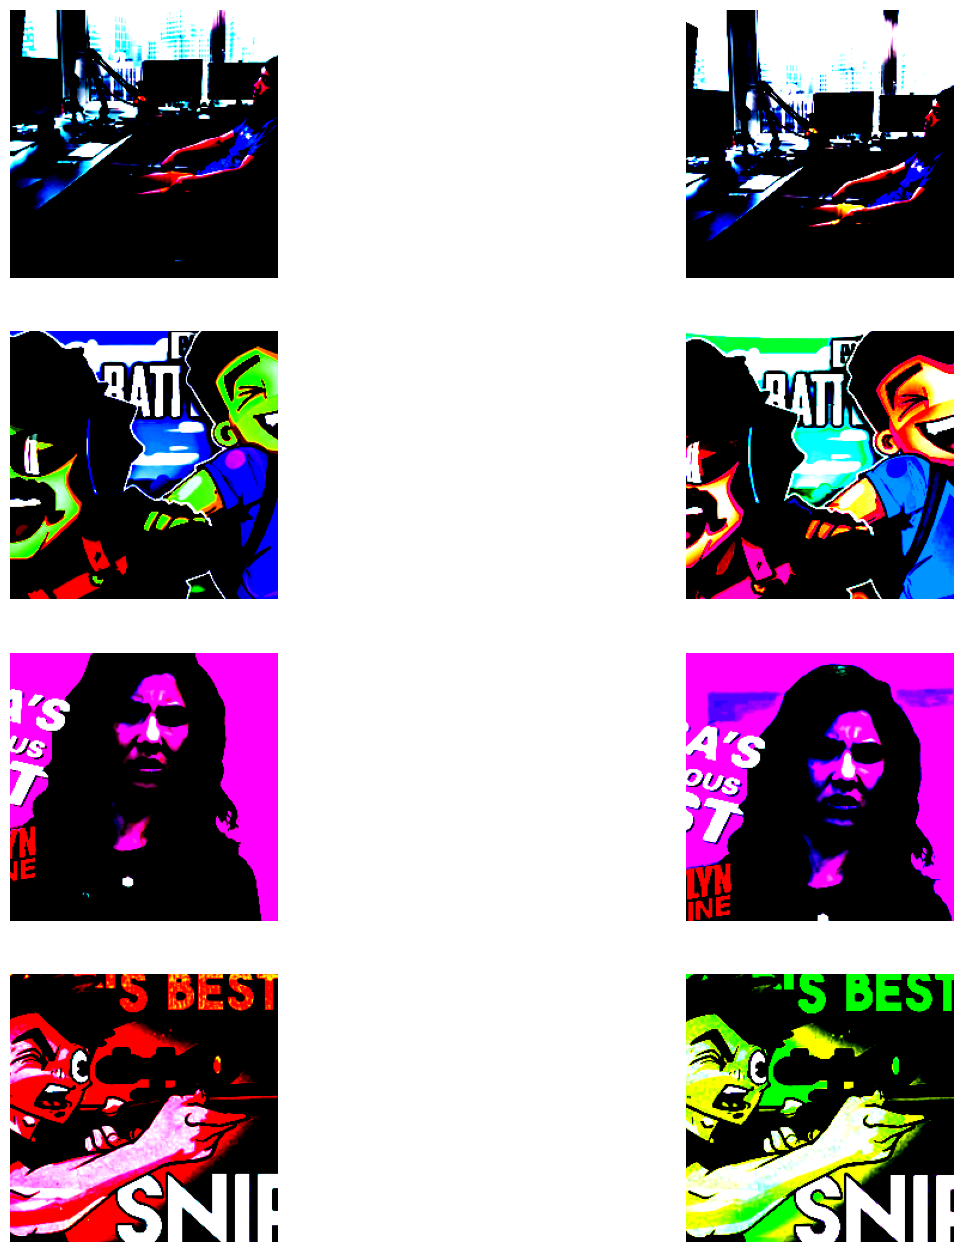

In [368]:
batch_size = 16
shuffle = SHUFFLE

SHUFFLE = False # 셔플 끄면 됨 다 똑같음.  셔플 true로하면 달라진다. 이제 randomness를 통제해야됨.

# Set the random seed
RANDOMNESS = False
random_seed = 77
if RANDOMNESS != True:
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    np.random.seed(random_seed)
    random.seed(random_seed)
    print('################')
    print('no randomness')
    print('################')
    


## shuffle 할때 쓴는 random은 무엇일까?

# dataloader settings
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=SHUFFLE,num_workers=0, collate_fn=None, pin_memory=True,drop_last=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=SHUFFLE,num_workers=0, collate_fn=None, pin_memory=True,drop_last=True)

train_dataloader2 = DataLoader(train_dataset2, batch_size=batch_size, shuffle=SHUFFLE,num_workers=0, collate_fn=None, pin_memory=True,drop_last=True)
valid_dataloader2 = DataLoader(valid_dataset2, batch_size=batch_size, shuffle=SHUFFLE,num_workers=0, collate_fn=None, pin_memory=True,drop_last=True)

# for img,texts in train_dataloader:
#     print(img.shape)
#     print(texts.shape)
#     break

# for img,texts in valid_dataloader:
#     print(img.shape)
#     print(texts.shape)
#     break

for (img,texts),(img2,texts2) in zip(train_dataloader,train_dataloader2):
    print(img.shape)
    print(img2.shape)
    print(texts.shape)
    print(texts2.shape)
    check_shuffle_randomness(img,img2,texts,texts2)
    
    # print(img[0][0][0][0].item())
    plt.figure(figsize=(16, 16))
    num=0
    for i in range(4):
        a = img[num+i]
        a = a.numpy().transpose(1,2,0)
        plt.subplot(4, 2, 2*i + 1)
        # plt.title(text_list[num+i])
        plt.imshow(a)
        plt.axis("off")

        a = img2[num+i]

        a = a.numpy().transpose(1,2,0)
        plt.subplot(4, 2, 2*i + 2)
        # plt.title(new_list[num+i])
        plt.imshow(a)
        plt.axis("off")
    break

print()
# for (img,texts),(img2,texts2) in zip(valid_dataloader,valid_dataloader2):
#     print(img.shape)
#     print(img2.shape)
#     print(texts.shape)
#     print(texts2.shape)
#     break




### 아래와 같이 sampler를 이용해서 dataloader 단에서 나눠주는것은 실패했다.


In [11]:
#이방법은 실패
# len(train_idx),len(valid_idx)
# train_loader = torch.utils.data.DataLoader(
#     train_dataset,  
#     sampler=train_sampler,
#     num_workers=4,
#     pin_memory =True,
#     drop_last =True,
#     persistent_workers =True
#     )


"""
import numpy as np
num_train = len(train_dataset)          # 50,000
indices = list( range(num_train) )  # 0부터 50,000까지의 숫자가 순서대로 나열된 리스트
np.random.shuffle(indices)          # 0부터 50,000까지의 숫자가 순서없이 뒤섞인 리스트가 됨
split = int( np.floor( 0.2 * num_train ))  # 10,000
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(
    train_dataset,  
    sampler=train_sampler,
    num_workers=4,
    pin_memory =True,
    drop_last =True,
    persistent_workers =True
    )

valid_loader = torch.utils.data.DataLoader(
    train_dataset,  
    sampler=valid_sampler,
    num_workers=2,
    pin_memory =True,
    drop_last =True,
    persistent_workers =True
    )

for img,txt in train_loader:
    print(img.shape)
    print(txt.shape)

"""

'\nimport numpy as np\nnum_train = len(train_dataset)          # 50,000\nindices = list( range(num_train) )  # 0부터 50,000까지의 숫자가 순서대로 나열된 리스트\nnp.random.shuffle(indices)          # 0부터 50,000까지의 숫자가 순서없이 뒤섞인 리스트가 됨\nsplit = int( np.floor( 0.2 * num_train ))  # 10,000\ntrain_idx, valid_idx = indices[split:], indices[:split]\n\ntrain_sampler = SubsetRandomSampler(train_idx)\nvalid_sampler = SubsetRandomSampler(valid_idx)\n\ntrain_loader = torch.utils.data.DataLoader(\n    train_dataset,  \n    sampler=train_sampler,\n    num_workers=4,\n    pin_memory =True,\n    drop_last =True,\n    persistent_workers =True\n    )\n\nvalid_loader = torch.utils.data.DataLoader(\n    train_dataset,  \n    sampler=valid_sampler,\n    num_workers=2,\n    pin_memory =True,\n    drop_last =True,\n    persistent_workers =True\n    )\n\nfor img,txt in train_loader:\n    print(img.shape)\n    print(txt.shape)\n\n'

# 원래 dataset, dataloader


In [13]:

# import json
# from PIL import Image

# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader

# import clip
# from transformers import CLIPProcessor, CLIPModel

# # with open(json_path, 'r') as f:
# #     input_data = []
# #     for line in f:
# #         obj = json.loads(line)
# #         input_data.append(obj)

# model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# class image_title_dataset():
#     def __init__(self, list_image_path,list_txt):
#         # Initialize image paths and corresponding texts
#         self.image_path = list_image_path
#         # Tokenize text using CLIP's tokenizer
#         self.title  = clip.tokenize(list_txt)

#     def __len__(self):
#         return len(self.title)

#     def __getitem__(self, idx):
#         # Preprocess image using CLIP's preprocessing function
#         image = preprocess(Image.open(self.image_path[idx]))
#         title = self.title[idx]
#         return image, title
    

# # train_dataloader


# Models

In [366]:
aa=list(model.parameters())
len(aa)

for layer_name in aa:
    print(layer_name.size())
    break

torch.Size([77, 512])


In [257]:
import torch.optim as optim
from tqdm import tqdm 

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
print('out device :',device)


def convert_models_to_fp32(model): 
    for p in model.parameters(): 
        p.data = p.data.float() 
        p.grad.data = p.grad.data.float() 


if device == 'cpu':
    model.float()
else :
    clip.model.convert_weights(model) # Actually this line is unnecessary since clip by default already on float16

loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5,betas=(0.9,0.98),eps=1e-6,weight_decay=0.2) #Params used from paper, the lr is smaller, more safe for fine tuning to new dataset

EPOCH = 15
# add your own code to track the training progress.
for epoch in range(EPOCH):
    print("Epoch : ",epoch)
    for i,batch in enumerate(train_dataloader):
        optimizer.zero_grad()

        images,texts = batch 

        images= images.to(device)
        texts = texts.to(device)
        
        logits_per_image, logits_per_text = model(images, texts)
        # tensor.size(batch_size, batch_size)
        
        ground_truth = torch.arange(len(images),dtype=torch.long,device=device)
        # tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  .... ,batch_size])
        
        total_loss = (loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2
        total_loss.backward()
        print('i batch : ',i,'  !!loss :',total_loss)
        if device == 'cpu':
            optimizer.step()
        else : 
            convert_models_to_fp32(model)
            optimizer.step()
            clip.model.convert_weights(model)
        break
    break

out device : cpu
Epoch :  0
i batch :  0   !!loss : tensor(0.5941, grad_fn=<DivBackward0>)


In [379]:
# 파라미터 개수 계산
parameter_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(parameter_count/1e9,'Billion')

0.151277313 Billion


# variant's of loss function using simCLR, simCSE

In [374]:
import torch.optim as optim
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
print('out device :',device)


loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()

# loss_alignment = nn.MSELoss()
loss_alignment = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=5e-5,betas=(0.9,0.98),eps=1e-6,weight_decay=0.2) #Params used from paper, the lr is smaller, more safe for fine tuning to new dataset

EPOCH = 15


EPOCH = 1
# add your own code to track the training progress.
for epoch in tqdm(range(EPOCH)):
    print('##################')
    print("Epoch : ",epoch)
    print('##################')
    for step,((img,texts),(img2,texts2))in enumerate(zip(train_dataloader,train_dataloader2)):
        optimizer.zero_grad()

        images= img.to(device)
        images2= img2.to(device)
        texts = texts.to(device)
        texts2 = texts2.to(device)
        
        
        image_embeddings = model.encode_image(images)
        image_embeddings2 = model.encode_image(images2)
        
        text_embeddings = model.encode_text(texts)
        text_embeddings2 = model.encode_text(texts2)
        
        def similarity(h1,h2,temperature=1.0):
            sim = torch.dot(h1,h2)/(torch.dot(h1,h1)*torch.dot(h2,h2))
            return -sim/temperature
        
        # list로 여러개 만드는것.
        alignment = similarity(image_embeddings[0],image_embeddings2[0]).unsqueeze(0)
        for i in range(1,batch_size):
            h1 = image_embeddings[i]
            h2 = image_embeddings2[i]
            alignment =torch.concat((alignment,similarity(h1,h2).unsqueeze(0)),dim=0)
        ground_truth = torch.ones(len(images),dtype=torch.long,device=device)
        # [1,1,1,...]
        
        
        # # 하나의 loss값.
        # alignment = torch.tensor(0.)
        # for i in range(batch_size):
        #     h1 = image_embeddings[i]
        #     h2 = image_embeddings2[i]
        #     alignment += similarity(h1,h2)
        # ground_truth = torch.tensor(1.)
        
        ################# ground true 값 조정
        # ground_truth = torch.arange(len(images),dtype=torch.long,device=device)
        # [1,2,3,4,]
        
        
        # loss function
        total_loss = torch.sum((ground_truth-alignment)**2/batch_size)
        # total_loss = -ground_truth*torch.log(alignment)
        # total_loss = loss_alignment(ground_truth,alignment)
        total_loss.backward()
        print('i batch : ',step,'  !!loss :',total_loss)
        # if device == 'cpu':
        optimizer.step()
        break
    break


out device : cpu


  0%|          | 0/1 [00:00<?, ?it/s]

##################
Epoch :  0
##################
i batch :  0   !!loss : tensor(1.0184, grad_fn=<SumBackward0>)


  0%|          | 0/1 [00:07<?, ?it/s]


In [361]:
ground_truth = torch.tensor(1.)

# loss function
# total_loss = (ground_truth-alignment)**2
print(alignment)

total_loss = -ground_truth*torch.log(torch.exp(alignment))
print(total_loss)
torch.log(alignment)

tensor(-1.5183, grad_fn=<AddBackward0>)
tensor(1.5183, grad_fn=<MulBackward0>)


tensor(nan, grad_fn=<LogBackward0>)

# Objective function

<!--log \exp^ -->
$$
h_i = f(x_i)
$$
N = batch_size

sim  = cosine, mutual information, euclidean distance
## Loss function
$$
\mathcal{L} = \sum_{i=1}^{N} log \exp^ {-\frac{1}{\tau}  sim(h_i,h_i^+)} (Alignment)
$$
$$
+ \sum_{i=1}^{N} log \sum_{j \neq i}^{N} \exp^{\frac{1}{\tau} sim(h_i,h_j)} (Anisotropy)
$$

In [189]:
torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': total_loss,
        }, f"model_{EPOCH}.pt") #just change to your preferred folder/filename

In [192]:
model, preprocess = clip.load("ViT-B/32",device=device,jit=False) #Must set jit=False for training

model, preprocess = clip.load("ViT-B/32", device=device)
checkpoint = torch.load("model_10.pt")

# Use these 3 lines if you use default model setting(not training setting) of the clip. For example, if you set context_length to 100 since your string is very long during training, then assign 100 to checkpoint['model_state_dict']["context_length"] 
# checkpoint['model_state_dict']["input_resolution"] = model.input_resolution #default is 224
# checkpoint['model_state_dict']["context_length"] = model.context_length # default is 77
# checkpoint['model_state_dict']["vocab_size"] = model.vocab_size 

model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

# loss function modify

## cross entropy -> contrastive learning


In [41]:
input = torch.randn(2, 2, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
input,target

(tensor([[-0.4380,  0.0920],
         [-0.3785, -0.7993]], requires_grad=True),
 tensor([1, 1, 1]))